# Insurance Charges Prediction Model

## Data Exploration

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df = pd.read_csv('/content/drive/My Drive/insurance.csv')

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
df.shape

(1338, 7)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


## Exploratory Data Analysis

In [ ]:
df.groupby('sex').mean().reset_index()

,sex,age,bmi,children,charges
0,female,39.503021,30.377749,1.074018,12569.578844
1,male,38.917160,30.943129,1.115385,13956.751178


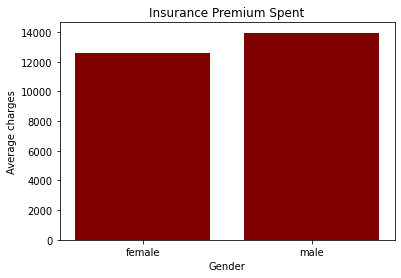

In [ ]:
plt.bar(df.groupby('sex').mean().reset_index()['sex'],df.groupby('sex').mean().reset_index()['charges'],color='maroon')
plt.xlabel('Gender')
plt.ylabel('Average charges')
plt.title('Insurance Premium Spent')
plt.show()

Observation - On an average, charges of male are slightly more than that of female.

In [ ]:
df.groupby('smoker').mean().reset_index()

,smoker,age,bmi,children,charges
0,no,39.385338,30.651795,1.090226,8434.268298
1,yes,38.514599,30.708449,1.113139,32050.231832


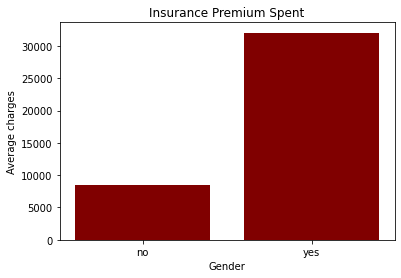

In [ ]:
plt.bar(df.groupby('smoker').mean().reset_index()['smoker'],df.groupby('smoker').mean().reset_index()['charges'],color='maroon')
plt.xlabel('Gender')
plt.ylabel('Average charges')
plt.title('Insurance Premium Spent')
plt.show()

Observation - The charges on smoker have so much more than on non-smokers.

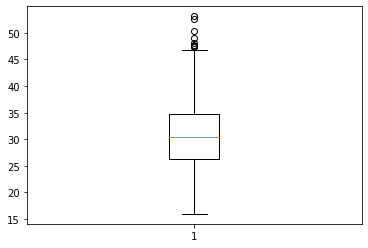

<Figure size 1440x1080 with 0 Axes>

In [ ]:
plt.boxplot(df['bmi'])
fig = plt.figure(figsize =(20, 15))
plt.show()

Observation - There are some outliers present of bmi in dataset.

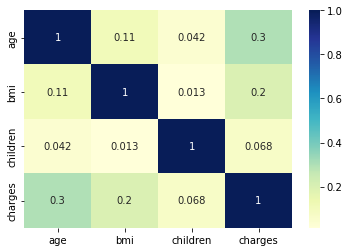

In [ ]:
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)
plt.show()

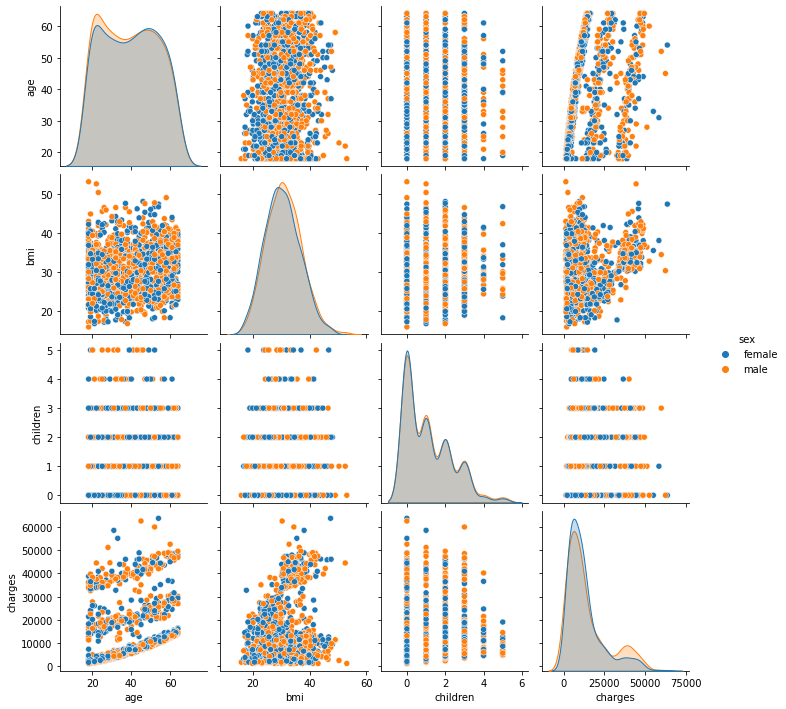

In [ ]:
sns.pairplot(df, hue = 'sex') 

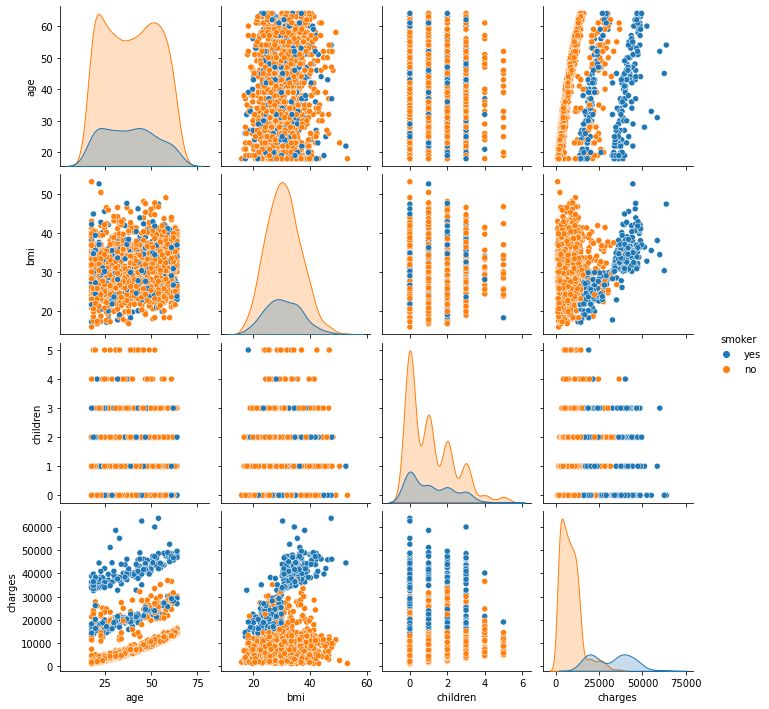

In [ ]:
sns.pairplot(df, hue = 'smoker') 

## Data Preprocessing 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


### Converting all the categorical features into numerical features 

In [ ]:
#sex
df['sex'].unique()

array(['female', 'male'], dtype=object)

In [ ]:
df['sex']=df['sex'].map({'female':0,'male':1})

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,yes,southwest,16884.92400
1,18,1,33.770,1,no,southeast,1725.55230
2,28,1,33.000,3,no,southeast,4449.46200
3,33,1,22.705,0,no,northwest,21984.47061
4,32,1,28.880,0,no,northwest,3866.85520


In [ ]:
#smoker
df['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [ ]:
df['smoker']=df['smoker'].map({'no':0,'yes':1})

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [ ]:
#region
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [ ]:
df_region=pd.get_dummies(df['region'],drop_first=True)

In [ ]:
df_region

,northwest,southeast,southwest
0,0,0,1
1,0,1,0
2,0,1,0
3,1,0,0
4,1,0,0
...,...,...,...
1333,1,0,0
1334,0,0,0
1335,0,1,0
1336,0,0,1


In [ ]:
df=pd.concat([df,df_region],axis=1)

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges,northwest,southeast,southwest
0,19,0,27.900,0,1,southwest,16884.92400,0,0,1
1,18,1,33.770,1,0,southeast,1725.55230,0,1,0
2,28,1,33.000,3,0,southeast,4449.46200,0,1,0
3,33,1,22.705,0,0,northwest,21984.47061,1,0,0
4,32,1,28.880,0,0,northwest,3866.85520,1,0,0


In [ ]:
df.drop('region',axis=1,inplace=True)

In [ ]:
df.head()

,age,sex,bmi,children,smoker,charges,northwest,southeast,southwest
0,19,0,27.900,0,1,16884.92400,0,0,1
1,18,1,33.770,1,0,1725.55230,0,1,0
2,28,1,33.000,3,0,4449.46200,0,1,0
3,33,1,22.705,0,0,21984.47061,1,0,0
4,32,1,28.880,0,0,3866.85520,1,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        1338 non-null   int64  
 1   sex        1338 non-null   int64  
 2   bmi        1338 non-null   float64
 3   children   1338 non-null   int64  
 4   smoker     1338 non-null   int64  
 5   charges    1338 non-null   float64
 6   northwest  1338 non-null   uint8  
 7   southeast  1338 non-null   uint8  
 8   southwest  1338 non-null   uint8  
dtypes: float64(2), int64(4), uint8(3)
memory usage: 66.8 KB


In [ ]:
df['northwest'] = df['northwest'].astype(int)
df['southeast'] = df['southeast'].astype(int)
df['southwest'] = df['southwest'].astype(int)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        1338 non-null   int64  
 1   sex        1338 non-null   int64  
 2   bmi        1338 non-null   float64
 3   children   1338 non-null   int64  
 4   smoker     1338 non-null   int64  
 5   charges    1338 non-null   float64
 6   northwest  1338 non-null   int64  
 7   southeast  1338 non-null   int64  
 8   southwest  1338 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 94.2 KB


## Model Building 

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score,mean_squared_error, mean_absolute_error
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import  RandomForestRegressor
from xgboost import XGBRFRegressor

In [ ]:
X = df.drop('charges',axis=1)
y = df.charges

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=12)

In [ ]:
pipeline_lr=Pipeline([('scalar1',StandardScaler()),
                     ('lr_regressor',LinearRegression())])

In [ ]:
pipeline_dt=Pipeline([('scalar2',StandardScaler()),
                     ('dt_regressor',DecisionTreeRegressor())])

In [ ]:
pipeline_rf=Pipeline([('scalar3',StandardScaler()),
                     ('dt_regressor',RandomForestRegressor())])

In [ ]:
pipeline_xg=Pipeline([('scalar4',StandardScaler()),
                     ('dt_regressor',XGBRFRegressor())])

In [ ]:
pipelines = [pipeline_lr, pipeline_dt, pipeline_rf, pipeline_xg]

In [ ]:
pipe_dict = {0: 'Linear Regression', 1: 'Decision Tree', 2: 'Random Forest', 3:'XG Boost'}

In [ ]:
for pipe in pipelines:
    pipe.fit(X_train, y_train)

[03:43:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
for i,model in enumerate(pipelines):
    print("{} r2 score: {}".format(pipe_dict[i],model.score(X_test,y_test)))

Linear Regression r2 score: 0.7100098801471328
Decision Tree r2 score: 0.682501877383606
Random Forest r2 score: 0.8145476781371184
XG Boost r2 score: 0.801415774193581


In [ ]:
best_accuracy=0.0
best_regressor=0
best_pipeline=""
for i,model in enumerate(pipelines):
    if model.score(X_test,y_test)>best_accuracy:
        best_accuracy=model.score(X_test,y_test)
        best_pipeline=model
        best_regressor=i
print('regressor with best accuracy:{}'.format(pipe_dict[best_regressor]))

regressor with best accuracy:Random Forest


## Test the model 

In [ ]:
X.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'northwest', 'southeast',
       'southwest'],
      dtype='object')

In [ ]:
np.where(X.columns == 'northwest')[0][0]

5

In [ ]:
def predict_charges(age,sex,bmi,children,smoker,region):
    loc_index = np.where(X.columns==region)[0][0]
    
    x = np.zeros(len(X.columns))
    x[0] = age
    x[1] = sex
    x[2] = bmi
    x[3] = children
    x[4] = smoker
    if loc_index >= 0:
        x[loc_index] = 1
        
    return pipeline_xg.predict([x])[0]
    

In [ ]:
predict_charges(28,1,33.000,3,0,'southeast')

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


6679.7124